# TP2 – Compression d’un signal

## Exercice d’initiation à Matlab

Texte : Ceci est un texte en Francais. Il contient des lettres (majuscules et minuscules), des chiffres de zero (0) a neuf (9) et quelques caracteres de ponctuation comme la virgule (,), le point (.), les deux points (:) etc. Par contre il ne contient pas de caractere accentue, de guillemets, dapostrophe ou de cedille, qui ne sont pas des caracteres ASCII standards. Il sert simplement a illustrer la loi de probabilite de lalphabet francais. En fait nimporte quel texte convient, du moment quil soit assez long pour illustrer la langue francaise. Du coup on met bout a bout des phrases sans reel lien logique, mais qui permettront dobtenir un histogramme assez representatif de la langue francaise. Normalement le caractere le plus present est lespace, suivi du e, du s, a, i, t... Ce genre dhistogramme est tres utile en cryptographie : chaque langue possede son propre histogramme, ce qui permet de reconnaitre la langue dun texte code meme si les lettres ont ete changees. Evidemment, un bon ou

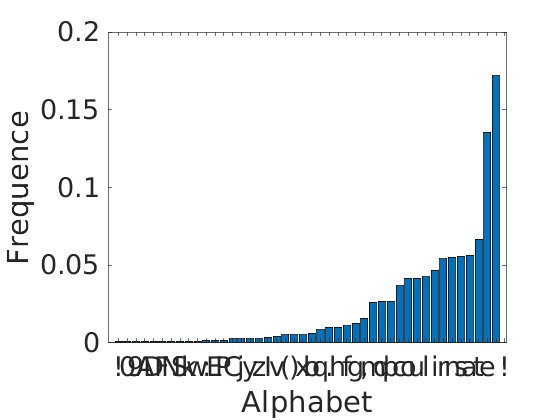

In [95]:
%% file exercice_Matlab.m
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

% Definition d'un alphabet ASCII avec les lettres A..Z, a..z, les chiffres 1..9 et la ponctuation :
taille_alphabet = 128;
codes_ASCII = transpose(0:taille_alphabet-1);		% Vecteur (colonne) de codes ASCII
alphabet = char(codes_ASCII);				% Vecteur de caracteres ASCII

% Texte ecrit en francais :
texte = 'Ceci est un texte en Francais. Il contient des lettres (majuscules et minuscules), des chiffres de zero (0) a neuf (9) et quelques caracteres de ponctuation comme la virgule (,), le point (.), les deux points (:) etc. Par contre il ne contient pas de caractere accentue, de guillemets, dapostrophe ou de cedille, qui ne sont pas des caracteres ASCII standards. Il sert simplement a illustrer la loi de probabilite de lalphabet francais. En fait nimporte quel texte convient, du moment quil soit assez long pour illustrer la langue francaise. Du coup on met bout a bout des phrases sans reel lien logique, mais qui permettront dobtenir un histogramme assez representatif de la langue francaise. Normalement le caractere le plus present est lespace, suivi du e, du s, a, i, t... Ce genre dhistogramme est tres utile en cryptographie : chaque langue possede son propre histogramme, ce qui permet de reconnaitre la langue dun texte code meme si les lettres ont ete changees. Evidemment, un bon outil de cryptographie fera en sorte de ne pas chiffrer deux occurrences dune meme lettre de la meme facon, sinon ce serait trop simple ! Pour finir ce texte, jajoute un k et un w, parce quil ny en avait pas encore.';

% Affichage du texte :
fprintf('Texte : %s\n',texte);

% Frequences relatives des lettres dans le texte :
frequences = calcul_frequences(texte, alphabet);

% Selection des caracteres de frequences non nulles :
[selection_frequences,selection_alphabet] = selection(frequences, alphabet);

% Tri des caracteres par frequences decroissantes :
[frequences_triees, indices_frequences_triees] = tri(selection_frequences);

% Histogramme des frequences des differents caracteres :
figure('Name','Histogramme des caracteres du texte','Position',[0.33*L,0,0.67*L,H]);
bar(frequences_triees);
set(gca,'XTick',[1:length(alphabet)]);
set(gca,'XTickLabel',selection_alphabet(indices_frequences_triees));
xlabel('Alphabet','FontSize',15);
ylabel('Frequence','FontSize',15);
set(gca,'FontSize',20);

save exercice_Matlab;

In [80]:
%%file calcul_frequences.m

function frequences = calcul_frequences(texte, alphabet)
    % calcul_frequences calcule les fréquences relatives des caractères dans le texte passé en paramètre.
    taille_texte = length(texte);
    taille_alphabet = length(alphabet);
    frequences = zeros(taille_alphabet, 1);
    for i = 1:taille_alphabet
        frequences(i) = length(find(texte==alphabet(i)));
    end
    frequences = frequences/taille_texte;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/calcul_frequences.m'.


In [81]:
%%file selection.m

function [selection_frequences,selection_alphabet] = selection(frequences, alphabet)
    % selection sélectionne les caractères de fréquences strictement positives, et les fréquences associées.
    mask = find(frequences~=0);
    selection_frequences = frequences(mask);
    selection_alphabet = alphabet(mask);
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/selection.m'.


In [93]:
%%file tri.m

function [frequences_triees, indices_frequences_triees] = tri(selection_frequences)
    % selection sélectionne les caractères de fréquences strictement positives, et les fréquences associées.
    [frequences_triees, indices_frequences_triees] = sort(selection_frequences);
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/tri.m'.


## Exercice 1 : codage de Huffman d’un texte

In [105]:
%%file exercice_1.m
clear;
close all;
load exercice_Matlab;

% Encodage du texte :
alphabet_cell = num2cell(selection_alphabet);			% Format 'cell' requis par la fonction huffmandict
dico = huffmandict(alphabet_cell,selection_frequences);		% dico{j,2} = code binaire du caractere ASCII dico{j,1}
texte_encode = huffmanenco(texte,dico);
fprintf('Codage binaire du texte : %s\n',strrep(num2str(texte_encode),' ',''));

% Calcul du coefficient de compression obtenu par le codage de Huffman :
coeff_compression = coeff_compression_texte(texte,texte_encode);
fprintf('Coefficient de compression : %.4f\n',coeff_compression);

% Decodage du texte : 
texte_decode = huffmandeco(texte_encode,dico);

% Verification de l'integrite du texte decode :
integrite_decodage = ~strcmp(texte,texte_decode);
if integrite_decodage
	fprintf('Integrite du decodage OK\n');
else
	fprintf('Probleme d''integrite du decodage !\n');
end


Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/exercice_1.m'.


In [110]:
clear;
close all;
load exercice_Matlab;

In [111]:
% Encodage du texte :
alphabet_cell = num2cell(selection_alphabet);			% Format 'cell' requis par la fonction huffmandict
dico = huffmandict(alphabet_cell,selection_frequences);		% dico{j,2} = code binaire du caractere ASCII dico{j,1}
texte_encode = huffmanenco(texte,dico);
fprintf('Codage binaire du texte : %s\n',strrep(num2str(texte_encode),' ',''));

Codage binaire du texte : 00110000101000111111000001010010110000001001010000011001011011110110010000010101000011010011101011100010100011110001110100100110110000111011111110000011100101101001101110010101001100001100001010010001111010011001101011010100100000110011110011000001100000001001001001110010011110101001000010011000011001111010100010010010011100100111101010010011001001110000011000010100100000111001101011101101101101101011010100100011000010000001100010010101100101000001100111101000010001100100001000000101001000100110110000001100111101001101001100100000100110000011101000100010111101110100010001010010000011110001011100000111011001010110101001000110000100000111100101101000111011000100100001101110001011010000001110010111001110010100001111100000001110110111010111101010010011110100000011001101110000110010011100000111101000001111001011110101001100000011001100110110011001001110000011110101001000110000100010011011110000111100101111010100110100100000110011110100000001100100000100110001110011

In [124]:
%%file coeff_compression_texte.m
function coeff_compression = coeff_compression_texte(texte, texte_encode)
    %  la fonction coeff_compression_texte, qui calcule le coefficient de compression atteint par le
    % codage de Huffman, défini comme le rapport entre le nombre de bits nécessaires pour encoder un texte dans sa
    % version d’origine, sachant qu’en ASCII, les caractères sont encodés sur 8 bits, et le nombre de bits du même
    % texte encodé par le codage de Huffman.
    texte_mem = length(texte)*8; %Car chaque caractères encodés sur 8 bits
    texte_encode_mem = length(texte_encode);
    coeff_compression = texte_mem/texte_encode_mem;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/coeff_compression_texte.m'.


In [126]:
% Calcul du coefficient de compression obtenu par le codage de Huffman :
coeff_compression = coeff_compression_texte(texte,texte_encode);
fprintf('Coefficient de compression : %.4f\n',coeff_compression);

Coefficient de compression : 1.8689


In [113]:
% Decodage du texte : 
texte_decode = huffmandeco(texte_encode,dico);

In [114]:
% Verification de l'integrite du texte decode :
integrite_decodage = ~strcmp(texte,texte_decode);
if integrite_decodage
	fprintf('Integrite du decodage OK\n');
else
	fprintf('Probleme d''integrite du decodage !\n');
end

Integrite du decodage OK


## Exercice 2 : codage de Huffman d’une image

In [129]:
%%file exercice_2.m

clear;
close all;

% Codage de Huffman de l'image initiale :
load exercice_1_TP1;
frequences = histogramme/sum(histogramme);
dico = huffmandict(I_min:I_max,frequences);

% Calcul du coefficient de compression obtenu par le codage de Huffman :
coeff_compression_avant_decorrelation = coeff_compression_image(histogramme,dico);
fprintf('Coefficient de compression avant decorrelation : %.4f\n',coeff_compression_avant_decorrelation);

% Codage de Huffman de l'image decorrelee :
load exercice_2_TP1;
set(0,'RecursionLimit',550);	% Plus de 500 appels recursifs (nombre d'entiers a coder : 2*I_max+1 = 511 > 500)
frequences = histogramme/sum(histogramme);
dico = huffmandict(I_min:I_max,frequences);

% Calcul du coefficient de compression obtenu par decorrelation prealable au codage de Huffman :
coeff_compression_apres_decorrelation = coeff_compression_image(histogramme,dico);
fprintf('Coefficient de compression apres decorrelation : %.4f\n',coeff_compression_apres_decorrelation);

% Calcul du gain en compression :
fprintf('Gain en compression : %.4f\n',coeff_compression_apres_decorrelation/coeff_compression_avant_decorrelation);


Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/exercice_2.m'.


In [138]:
clear;
close all;

In [139]:
% Codage de Huffman de l'image initiale :
load exercice_1_TP1;
frequences = histogramme/sum(histogramme);
dico = huffmandict(I_min:I_max,frequences);

In [182]:
nbr_pixel = sum(histogramme);
image_mem = nbr_pixel*8
a = cellfun('length', dico);
a = a(:, 2);
size(a)
histogramme*a


image_mem =

      524288


ans =

   256     1


ans =

      461690



In [189]:
%%file coeff_compression_image.m
function coeff_compression = coeff_compression_image(histogramme,dico)
    nbr_pixel = sum(histogramme);
    image_mem = nbr_pixel*8; %Car chaque pixel utilise 2^8=256.
    mem_codage_intensite = cellfun('length', dico); %Matrice des tailles de toute les cellules.
    mem_codage_intensite = mem_codage_intensite(:, 2); %Vecteur qui donne le nbr de bits neccessaire pour coder chaque intensite entre 0 et 255.
    image_encode_mem = histogramme*mem_codage_intensite;
    coeff_compression = image_mem/image_encode_mem;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/coeff_compression_image.m'.


In [191]:
% Calcul du coefficient de compression obtenu par le codage de Huffman :
coeff_compression_avant_decorrelation = coeff_compression_image(histogramme,dico);
fprintf('Coefficient de compression avant decorrelation : %.4f\n',coeff_compression_avant_decorrelation);

Coefficient de compression avant decorrelation : 1.1356


In [192]:
% Codage de Huffman de l'image decorrelee :
load exercice_2_TP1;
set(0,'RecursionLimit',550);	% Plus de 500 appels recursifs (nombre d'entiers a coder : 2*I_max+1 = 511 > 500)
frequences = histogramme/sum(histogramme);
dico = huffmandict(I_min:I_max,frequences);

In [193]:
% Calcul du coefficient de compression obtenu par decorrelation prealable au codage de Huffman :
coeff_compression_apres_decorrelation = coeff_compression_image(histogramme,dico);
fprintf('Coefficient de compression apres decorrelation : %.4f\n',coeff_compression_apres_decorrelation);

Coefficient de compression apres decorrelation : 1.5752


In [194]:
% Calcul du gain en compression :
fprintf('Gain en compression : %.4f\n',coeff_compression_apres_decorrelation/coeff_compression_avant_decorrelation);

Gain en compression : 1.3871


## Exercice 3 : codage arithmétique d’un texte (facultatif)

In [301]:
%%file exercice_3.m

clear;
close all;

% Definition d'un alphabet ASCII avec les lettres A..Z, a..z, les chiffres 1..9 et la ponctuation :
taille_alphabet = 128;
codes_ASCII = transpose(0:taille_alphabet-1);		% Vecteur (colonne) de codes ASCII
alphabet = char(codes_ASCII);				% Vecteur de caracteres ASCII

% Texte a encoder :
texte = 'Taratatatsointsoin';

% Affichage du texte :
fprintf('Texte : %s\n',texte);

% Frequences d'apparition des lettres dans le texte :
frequences = calcul_frequences(texte,alphabet);

% Selection des caracteres de frequences non nulles :
[selection_frequences,selection_alphabet] = selection(frequences,alphabet);

% Partitionnement de l'intervalle [0,1] :
bornes = partitionnement(selection_frequences);

% Codage arithmetique :
[borne_inf,borne_sup] = codage_arithmetique(texte,selection_alphabet,bornes);

% Choix (arbitraire) d'un nombre compris dans l'intervalle [borne_inf,borne_sup] pour encoder le texte :
k = 1;
while (floor(k*borne_inf)==floor(k*borne_sup))
	k = 10*k;	
end
texte_encode = floor(k*borne_sup)/k;
fprintf('Texte encode : %.15f\n',texte_encode);

% Decodage du texte encode :
texte_decode = '';
texte_encode_courant = texte_encode;
for i = 1:length(texte)
	c = find((texte_encode_courant>bornes(1,:))&(texte_encode_courant<bornes(2,:)));	% Identification du caractere
	texte_decode = [texte_decode selection_alphabet(c)];				% Concatenation du caractere
	texte_encode_courant = (texte_encode_courant-bornes(1,c))/selection_frequences(c)';	% Soustraction de la borne inferieure et division par la probabilite pour obtenir le caractere suivant
    %%ERREUR ?? selection_frequences(c)'
end
fprintf('Texte decode : %s\n',texte_decode);

% Calcul du nombre de bits necessaires pour encoder la partie decimale :
dec_texte_encode = texte_encode*k;					% Partie decimale
nb_bits_codage_arithmetique = length(dec2bin(dec_texte_encode));	% Conversion de la partie decimale en binaire (dec2bin)
fprintf('Nombre de bits du codage arithmetique : %d\n',nb_bits_codage_arithmetique);

% Comparaison avec le codage de Huffman :
dico = huffmandict(num2cell(selection_alphabet),selection_frequences);
texte_encode = huffmanenco(texte,dico);
nb_bits_codage_Huffman = length(texte_encode);
fprintf('Nombre de bits du codage de Huffman : %d\n',nb_bits_codage_Huffman);


Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/exercice_3.m'.


In [195]:
clear;
close all;

In [196]:
% Definition d'un alphabet ASCII avec les lettres A..Z, a..z, les chiffres 1..9 et la ponctuation :
taille_alphabet = 128;
codes_ASCII = transpose(0:taille_alphabet-1);		% Vecteur (colonne) de codes ASCII
alphabet = char(codes_ASCII);				% Vecteur de caracteres ASCII

In [197]:
% Texte a encoder :
texte = 'Taratatatsointsoin';

% Affichage du texte :
fprintf('Texte : %s\n',texte);

% Frequences d'apparition des lettres dans le texte :
frequences = calcul_frequences(texte,alphabet);

% Selection des caracteres de frequences non nulles :
[selection_frequences,selection_alphabet] = selection(frequences,alphabet);


Texte : Taratatatsointsoin


In [211]:
length(selection_frequences)
[frequences_triees, indices_frequences_triees] = sort(selection_frequences, 'descend')
frequences_triees(1)


ans =

     8


frequences_triees =

    0.2222
    0.2222
    0.1111
    0.1111
    0.1111
    0.1111
    0.0556
    0.0556


indices_frequences_triees =

     2
     8
     3
     4
     5
     7
     1
     6


ans =

    0.2222



In [271]:
%%file partitionnement.m
function bornes = partitionnement(selection_frequences)
    %  crée la matrice bornes
    [frequences_triees, indices_frequences_triees] = sort(selection_frequences, 'descend');
    [0 0+selection_frequences(1)];
    bornes(1, :) = [0 0+selection_frequences(1)];
    for i = 2:length(selection_frequences)
        bornes(i, :) = [bornes(i-1, 2) bornes(i-1, 2)+selection_frequences(i)];
    end
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/partitionnement.m'.


In [273]:
% Partitionnement de l'intervalle [0,1] :
bornes = partitionnement(selection_frequences)


bornes =

         0    0.0556
    0.0556    0.2778
    0.2778    0.3889
    0.3889    0.5000
    0.5000    0.6111
    0.6111    0.6667
    0.6667    0.7778
    0.7778    1.0000



In [250]:
texte
selection_alphabet


texte =

    'Taratatatsointsoin'


selection_alphabet =

  8x1 char array

    'T'
    'a'
    'i'
    'n'
    'o'
    'r'
    's'
    't'



In [261]:
bornes
bornes(1,:)


bornes =

         0    0.0556
    0.0556    0.2778
    0.2778    0.3889
    0.3889    0.5000
    0.5000    0.6111
    0.6111    0.6667
    0.6667    0.7778
    0.7778    1.0000


ans =

         0    0.0556



In [283]:
bornes = partitionnement(selection_frequences)
borne_inf = 0;
borne_sup = 1;
for i = 1:length(texte)
    j = find(selection_alphabet == texte(i));
    largeur = borne_sup-borne_inf;
    borne_sup = borne_inf+largeur*bornes(j,2);
    borne_inf = borne_inf+largeur*bornes(j,1);
end
fprintf('Texte encode : %.15f\n', borne_inf);
fprintf('Texte encode : %.15f\n', borne_sup);


bornes =

         0    0.0556
    0.0556    0.2778
    0.2778    0.3889
    0.3889    0.5000
    0.5000    0.6111
    0.6111    0.6667
    0.6667    0.7778
    0.7778    1.0000

Texte encode : 0.010795828721649
Texte encode : 0.010795828721650


In [284]:
%%file codage_arithmetique.m
function [borne_inf, borne_sup] = codage_arithmetique(texte, selection_alphabet, bornes)
    % largeur = borne_sup-borne_inf;
    % borne_sup = borne_inf+largeur*bornes(2,j);
    % borne_inf = borne_inf+largeur*bornes(1,j);
    borne_inf = 0;
    borne_sup = 1;
    for i = 1:length(texte)
        j = find(selection_alphabet == texte(i));
        largeur = borne_sup-borne_inf;
        borne_sup = borne_inf+largeur*bornes(j,2);
        borne_inf = borne_inf+largeur*bornes(j,1);
    end
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp2/codage_arithmetique.m'.


In [286]:
% Codage arithmetique :
[borne_inf, borne_sup] = codage_arithmetique(texte, selection_alphabet, bornes)


borne_inf =

    0.0108


borne_sup =

    0.0108



In [298]:
% Choix (arbitraire) d'un nombre compris dans l'intervalle [borne_inf,borne_sup] pour encoder le texte :
k = 1;
while (floor(k*borne_inf)==floor(k*borne_sup))
	k = 10*k;	
end
texte_encode = floor(k*borne_sup)/k;
fprintf('Texte encode : %.15f\n', texte_encode);

% Decodage du texte encode :
texte_decode = '';
texte_encode_courant = texte_encode;
for i = 1:length(texte)
	c = find((texte_encode_courant>bornes(1,:))&(texte_encode_courant<bornes(2,:)));	% Identification du caractere
	texte_decode = [texte_decode selection_alphabet(c)];				% Concatenation du caractere
	texte_encode_courant = (texte_encode_courant-bornes(1,c))/selection_frequences(c)';	% Soustraction de la borne inferieure et division par la probabilite pour obtenir le caractere suivant
end
fprintf('Texte decode : %s\n',texte_decode);

Texte encode : 0.010795828721650
Texte decode : Ta


In [299]:
% Calcul du nombre de bits necessaires pour encoder la partie decimale :
dec_texte_encode = texte_encode*k;					% Partie decimale
nb_bits_codage_arithmetique = length(dec2bin(dec_texte_encode));	% Conversion de la partie decimale en binaire (dec2bin)
fprintf('Nombre de bits du codage arithmetique : %d\n',nb_bits_codage_arithmetique);

% Comparaison avec le codage de Huffman :
dico = huffmandict(num2cell(selection_alphabet),selection_frequences);
texte_encode = huffmanenco(texte,dico);
nb_bits_codage_Huffman = length(texte_encode);
fprintf('Nombre de bits du codage de Huffman : %d\n',nb_bits_codage_Huffman);

Nombre de bits du codage arithmetique : 47
Nombre de bits du codage de Huffman : 52
